## A Hands-on Workshop series in Machine Learning
### Session 2: More on `pandas`: Groupby operations
#### Instructor: Dr. Aashita Kesarwani


##### Groupby operations
In the last session, we learned the basics of data manipulation using `pandas`. Today, we will learn the **split-apply-combine** operations by **grouping rows** of a dataframe

First we import the relevant python modules:

In [40]:
import numpy as np
import pandas as pd

# The following two modules matplotlib and seaborn are for plots
import matplotlib.pyplot as plt
import seaborn as sns # Comment this if seaborn is not installed
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# # The module re is for regular expressions
import re

Loading the [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic) stored in the `csv` file as a dataframe using [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/AashitaK/datasets/main/titanic.csv')

We use `head()` function to peek into the first 5 rows (or any number of rows by using `head(n)`).

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[Description for the columns](https://www.kaggle.com/c/titanic/data) is as follows.  

|Variable|	Definition|	Key|   
|:---  |:--- |:---|
|PassengerId| Passenger ID |
|Survived| 	Survival|	0 = No, 1 = Yes |
|Pclass	|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex	|Sex|	
|Age	|Age in years	|
|SibSp	|# of siblings / spouses aboard the Titanic	|
|Parch	|# of parents / children aboard the Titanic	|
|Ticket	|Ticket number	|
|Fare	|Passenger fare	|
|Cabin	|Cabin number	|
|Embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

Use the functions [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) on the dataframe to find out the number of missing values in each column.

In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Detecting missing values is an important step in Feature Engineering, that is preparing the features (independent variables) to use for building the machine learning models. The next step is to handle those missing values. 

1. If you consider filling the missing values, what are the possible options? 
2. Can you make use of other values in that column to fill the missing values? 
3. Can you make use of other values in that row as well as values in that column to fill the missing values?

As we saw earlier, the column *Age* has a lot of missing values. Those missing values can be filled with the median (or mean) age of all passengers.

* Can you think of other options to fill the missing age values for the passengers? 
* Does the title of the passengers' provide useful information about their age? 

In the exercise session in the last session, we created a new column *Title* that is derived from the column *Name* using regular expressions. Below is the compact repetition of the code to do the same.

In [44]:
df['Title'] = df['Name'].apply(lambda name: re.findall("\w+[.]", name)[0])

df.Title.replace({'Ms.': 'Miss.', 'Mlle.': 'Miss.', 'Dr.': 'Rare', 'Mme.': 'Mrs.', 
                  'Major.': 'Rare', 'Lady.': 'Rare', 'Sir.': 'Rare', 'Col.': 'Rare', 
                  'Capt.': 'Rare', 'Countess.': 'Rare', 'Jonkheer.': 'Rare', 
                  'Dona.': 'Rare', 'Don.': 'Rare', 'Rev.': 'Rare'}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


Let us make use of the newly derived *Title* column to fill the age based on the title of the passengers. For this, it would be helpful to group the passengers based on their title to get the median age for each group and then fill the missing age values for passengers with the median age for their title.

### 1. [GroupBy object](https://pandas.pydata.org/pandas-docs/version/0.22/groupby.html)

We can use [`groupby()`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.groupby.html) to group the rows of the dataframe based on a column(s), say *Title*.

In [45]:
df.groupby('Title')

The resulting object is not a dataframe but **there are multiple ways to derive a dataframe from the grouped object**.

One of the ways to derive a dataframe from a groupby object is **by aggregation**, that is computing a summary statistic (or statistics) about each group. For example, we can get the median values for the columns in each group of titles.

In [46]:
df.groupby("Title").median()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,,
Master.,345.0,1.0,3.0,3.5,1.0,1.0,29.0625
Miss.,388.0,1.0,3.0,21.0,0.0,0.0,15.7417
Mr.,466.0,0.0,3.0,30.0,0.0,0.0,9.3500
Mrs.,435.5,1.0,2.0,35.0,1.0,0.0,26.0000
Rare,627.0,0.0,1.0,48.5,0.0,0.0,27.7208


The median age vary greatly for each group ranging from 3.5 to 48 years.

In [47]:
df.groupby("Title").mean()
df.groupby("Title").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Title,,,,,,,,,,,,
Master.,40,40,40,40,40,36,40,40,40,40,7,40
Miss.,185,185,185,185,185,149,185,185,185,185,49,184
Mr.,517,517,517,517,517,398,517,517,517,517,93,517
Mrs.,126,126,126,126,126,109,126,126,126,126,45,125
Rare,23,23,23,23,23,22,23,23,23,23,10,23


The most common way to derive a dataframe from a groupby object is by transformation using [`transform()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html).. This returns a dataframe with the same number of rows as the original dataframe. The `transform("median")` method operates on the numerical columns and replaces the original values with the median value for the corresponding group.

In [48]:
df.groupby("Title").transform("median")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,466.0,0.0,3.0,30.0,0.0,0.0,9.3500
1,435.5,1.0,2.0,35.0,1.0,0.0,26.0000
2,388.0,1.0,3.0,21.0,0.0,0.0,15.7417
3,435.5,1.0,2.0,35.0,1.0,0.0,26.0000
4,466.0,0.0,3.0,30.0,0.0,0.0,9.3500
...,...,...,...,...,...,...,...
886,627.0,0.0,1.0,48.5,0.0,0.0,27.7208
887,388.0,1.0,3.0,21.0,0.0,0.0,15.7417
888,388.0,1.0,3.0,21.0,0.0,0.0,15.7417
889,466.0,0.0,3.0,30.0,0.0,0.0,9.3500


Our goal is to create a new column *MedianAge* which consists of the groupwise median age depending on the passengers' title. So, we use [`transform()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html) only on the *Age* column instead of the whole dataframe.

In [49]:
df["MedianAge"] = df.groupby("Title").transform("median")["Age"]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,MedianAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,30.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,35.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,21.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare,48.5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,21.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,21.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,30.0


In [50]:
df["Age"] = df["Age"].fillna(df["MedianAge"])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,MedianAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,30.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,35.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,21.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare,48.5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,21.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss.,21.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,30.0


So far, our original dataframe has not really changed.

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,MedianAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,30.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,35.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,21.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,30.0


We create a new column *MedianAge* using [`groupby()`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.groupby.html) and [`transform()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html) methods are demonstrated above.

Now we fill in the missing values in the *Age* column using the values in the *MedianAge* column.

In [53]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,MedianAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,30.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,35.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,21.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,30.0


We drop off the *MedianAge* column since we no longer need it and then check for the missing values.

In [54]:
df = df.drop('MedianAge', axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

There are no missing values in the Age column!

In the next section, you will use the `groupby` object and create a new feature.

### 2. Feature engineering on the Titanic dataset to create a new column for group size 

In this exercise, we are going to create a new column called `GroupSize` to get the size of the group for each passenger. We consider groups to be either family members or those traveling on the same ticket. This feature is derived using three columns *SibSp*, *Parch* and *Ticket*. 

[Notes](https://www.kaggle.com/c/titanic/data) for the two features *SibSp* and *Parch* are as follows.

> SibSp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)
> 
> Parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

Create a new column named *Family* by adding the columns *SibSp* and *Parch* and then add 1 to it. Hint: Use `df["New_column"] = df["column_1"] + df["column_2"] + 1`.

In [57]:
df["Family"] = df["SibSp"] + df["Parch"] + 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss.,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,1


Now we check the survival rates with respect to the family size.

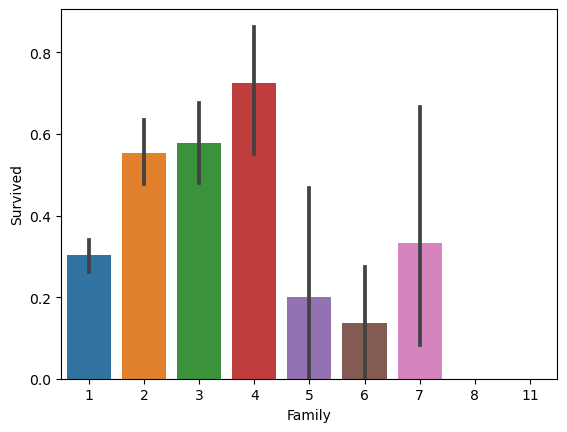

In [58]:
sns.barplot(x='Family', y='Survived', data=df);

Some passengers that appear to be traveling alone by account of their family size were part of a group traveling on the same ticket. To see this, get all the passengers traveling on the ticket "1601" (there are 7 of them).

In [70]:
# df.groupby("Ticket")
ticket_1601 = df[df["Ticket"] == "1601"]
ticket_1601

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,Mr.,1
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,Mr.,1
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,Mr.,1
643,644,1,3,"Foo, Mr. Choong",male,30.0,0,0,1601,56.4958,NaN,S,Mr.,1
692,693,1,3,"Lam, Mr. Ali",male,30.0,0,0,1601,56.4958,NaN,S,Mr.,1
826,827,0,3,"Lam, Mr. Len",male,30.0,0,0,1601,56.4958,NaN,S,Mr.,1
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,Mr.,1


One can check that there are many tickets shared among passengers that may or may not be family members.

In [66]:
df['Ticket'].value_counts()[:15]

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
17421           4
349909          4
113760          4
4133            4
113781          4
Name: Ticket, dtype: int64

Create a new column named *TicketCount* that counts the total number of passengers traveling in each passengers' ticket.

Hint: 
- First group passengers based on their tickets using `groupby()` on the *Ticket* column.
- For the grouped object, pick any column that has no missing values.
- Use `transform()` for this unique identifier column with the function `"count"` to create a new column *TicketCount*.

For example, we created *MedianAge* using the following code:   
```df['MedianAge'] = df.groupby('Title')['Age'].transform("median")```

In [80]:
df["TicketCount"] = df.groupby("Ticket").transform("count")["PassengerId"]

Let us peek into the dataframe.

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,TicketCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,1,1


Plot the survival rates based on the *TicketCount* using [`sns.barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) (We used this function in the last session. Please refer to the notebook from session 1 if needed).

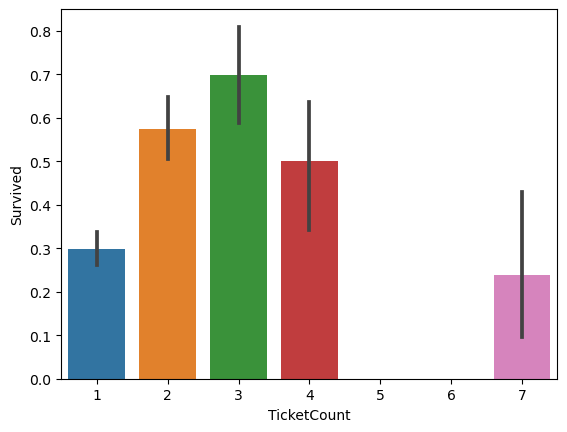

In [82]:
sns.barplot(x = "TicketCount", y = "Survived", data = df);

It does seem that the number of co-travelers have an impact on the survival rates.

Create a new column named *GroupSize* by picking the maximum value among the columns *Family* and *TicketCount*.   
Note: We consider groups to be either family members or those traveling on the same ticket.   
Hint: Use built-in [`max()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html) function for pandas on the two relevant columns with the appropriate value for the `axis` parameter. 

In [85]:
df["GroupSize"] = df[["Family", "TicketCount"]].max(axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,TicketCount,GroupSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,2,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare,1,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss.,4,2,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,1,1,1


Plot the survival rates based on the GroupSize using [`sns.barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html).

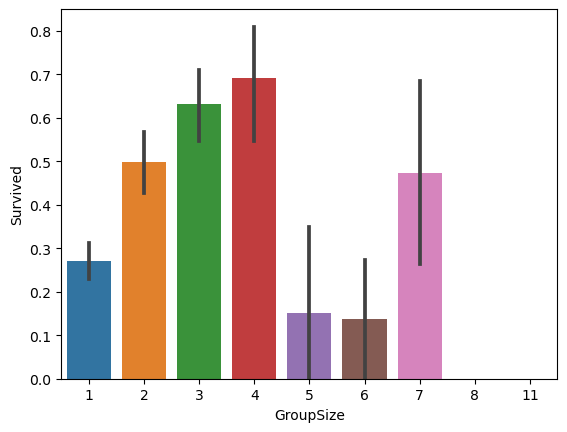

In [86]:
sns.barplot(x = "GroupSize", y = "Survived", data =df);

Check the number of rows where Groupsize is not equal to Family. Similarly, check the number of rows where TicketCount is not equal to Family.

In [87]:
df[df['GroupSize'] != df['Family']].shape[0], df[df['GroupSize'] != df['TicketCount']].shape[0]

(97, 191)

The output must be `(97, 191)`. Check your above code, if you get a different output.

### 3. Encoding categorical variables

Let us check the datatype of each column. Hint: Use [`dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).

In [88]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
Family           int64
TicketCount      int64
GroupSize        int64
dtype: object

In machine learning, our models usually take numbers as inputs rather than strings. We have to convert categorical data into a form the model can recognize.

We convert the gender values to numerical values 0 and 1 using [`replace`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html) with a suitable dictionary. 

In [89]:
df = df.replace({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,TicketCount,GroupSize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,2,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,1,1,1


What can go wrong with randomly assigning numbers to categories?

There are two kinds of categorical variables based on whether the categories possess an inherent order or not:
* Ordinal categorical variables
* Inordinal categorical variables

For example, passengers' ticket class `Pclass` takes the values 1, 2, and 3. These three categories have an inherent order and hence it is an ordinal categorical variable. On the other hand, gender takes two values - male and female, which have no intrinsic ordering and hence it is an inordinal categorical variable.

Does it mean that we can simply treat the ordinal variables such as `Pclass` as another numerical variable? Can you think of any problem this may cause in our model?

Other than a natural order, number also possess certain other properties. For example, the difference between the numbers 1 and 2 is the same as the difference between the numbers 2 and 3. 
$$ 2-1 == 3-2$$

Can we make the same claim for the categories labeled $1, 2,$ and $3$ in our ordinal variables `Pclass`?

So, converting categories to numbers means adding untrue assumptions that may or may not adversely affect our model. 

To address this, the commonly used method is one-hot encoding. In this method, we build a one-hot encoded vector with dimension equal to the number of classes in the categories. This vector consists of all 0's except for a 1 corresponding to the class of the instance. For example, the *Embarked* column will have one-hot encoded vectors of [1,0,0], [0,1,0] and [0,0,1] representing each of the three possible ports. 

How will this look in our dataset?  
Instead of a single column for the port of embarkment, we will have three columns corresponding to each port. The values in these columns will be $0$ or $1$. For each row, there will be only one $1$ among these three columns.

One-hot encoding is accomplished in pandas using [`get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) as given below. It simply creates a column for each class of a categorical variable.

In [90]:
pd.get_dummies(df['Embarked']).head(10)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


We want the column names to be `'Port_C', 'Port_Q', 'Port_S'`. Make use of the [`prefix` ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) keyword in `get_dummies` to alter the column names and save the one-hot encoded vectors to a new dataframe named `port_df`.

In [91]:
port_df = pd.get_dummies(df["Embarked"], prefix="Port")
port_df

,Port_C,Port_Q,Port_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Let's add `port_df` to the original dataframe `df`.

In [92]:
pd.concat([df, port_df], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,TicketCount,GroupSize,Port_C,Port_Q,Port_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,1,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2,1,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,2,2,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,Rare,1,1,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,Miss.,1,1,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss.,4,2,4,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,Mr.,1,1,1,1,0,0


The above looks good, so let us update the original dataframe.

In [93]:
df = pd.concat([df, port_df], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,TicketCount,GroupSize,Port_C,Port_Q,Port_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,1,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2,1,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,2,2,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,1,1,1,0,0,1


Notes:
- One of the columns in the one-hot encoding obtained in the above manner is always redundant. In case of features with just two classes such as gender in our dataset, one-hot encoding is not truly useful. One of its column is same as what we obtained by simply replacing classes with 0 and 1 and the other is redundant.  
- The main disadvantage of using one-hot encoding is the increase in the number of features that can negatively affect our model which we will discuss in the later sessions.

In [94]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
Family           int64
TicketCount      int64
GroupSize        int64
Port_C           uint8
Port_Q           uint8
Port_S           uint8
dtype: object

Next, do the same for other columns if required. 

Finally, we take input `X` and label `y` for our model.

In [103]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,TicketCount,GroupSize,Port_C,Port_Q,Port_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,1,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2,1,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,2,2,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,Rare,1,1,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,Miss.,1,1,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss.,4,2,4,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,Mr.,1,1,1,1,0,0


In [118]:
X = df[['Age', 'GroupSize', "Pclass", "Port_C", "Port_Q", "Port_S", "Sex", "Fare"]]  # Pick columns that you thing are useful
y = df['Survived'].astype('category')

In [119]:
X

,Age,GroupSize,Pclass,Port_C,Port_Q,Port_S,Sex,Fare
0,22.0,2,3,0,0,1,0,7.2500
1,38.0,2,1,1,0,0,1,71.2833
2,26.0,1,3,0,0,1,1,7.9250
3,35.0,2,1,0,0,1,1,53.1000
4,35.0,1,3,0,0,1,0,8.0500
...,...,...,...,...,...,...,...,...
886,27.0,1,2,0,0,1,0,13.0000
887,19.0,1,1,0,0,1,1,30.0000
888,21.0,4,3,0,0,1,1,23.4500
889,26.0,1,1,1,0,0,0,30.0000


In [120]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

### 4. Build a Logistic classifier using scikit-learn 
Steps:
* Split the train and validation set
* Define logistic classifer
* Fit logistic classifier
* Get accuracy scores on train and validation sets

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [122]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=0)
LR_clf = LogisticRegression()

In [123]:
LR_clf.fit(X_train, y_train)

LogisticRegression()

In [125]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR_clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on validation set: {:.2f}'
     .format(LR_clf.score(X_valid, y_valid)))

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on validation set: 0.80


#### Acknowledgment:
* [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic) dataset openly available in Kaggle is used in the exercises.
